In [1]:
# Data set source:
# UCI Machine Learning Repository
# https://archive.ics.uci.edu/ml/datasets/Flags

# Information about the data set:
'''
Title: Flag database

Source Information
   -- Creators: Collected primarily from the "Collins Gem Guide to Flags": Collins Publishers (1986).
   -- Donor: Richard S. Forsyth 
   -- Date: 5/15/1990

Number of Instances: 194

Number of attributes: 30 (overall)

Attribute Information:
   1. name	Name of the country concerned

   2. landmass	1=N.America, 2=S.America, 3=Europe, 4=Africa, 5=Asia, 6=Oceania

   3. zone	Geographic quadrant, based on Greenwich and the Equator 1=NE, 2=SE, 3=SW, 4=NW

   4. area	in thousands of square km

   5. population	in round millions

   6. language 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others

   7. religion 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others

   8. bars     Number of vertical bars in the flag

   9. stripes  Number of horizontal stripes in the flag

  10. colours  Number of different colours in the flag

  11. red      0 if red absent, 1 if red present in the flag
  12. green    same for green
  13. blue     same for blue
  14. gold     same for gold (also yellow)
  15. white    same for white
  16. black    same for black
  17. orange   same for orange (also brown)

  18. mainhue  predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)

  19. circles  Number of circles in the flag
  20. crosses  Number of (upright) crosses
  21. saltires Number of diagonal crosses
  22. quarters Number of quartered sections
  23. sunstars Number of sun or star symbols

  24. crescent 1 if a crescent moon symbol present, else 0
  25. triangle 1 if any triangles present, 0 otherwise
  26. icon     1 if an inanimate image present (e.g., a boat), otherwise 0
  27. animate  1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
  28. text     1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise

  29. topleft  colour in the top-left corner (moving right to decide  tie-breaks)

  30. botright Colour in the bottom-left corner (moving left to decide tie-breaks)
'''





import pandas
import sqlite3

def extract(filename,dbname):
    '''
    Opens the file with filename and extracts to a database dbname
    '''
    names = ["name","landmass","zone","area","population",
                "language","religion","bars","stripes","colours", "red","green","blue",
                "gold","white","black","orange","mainhue","circles","crosses","saltires","quarters",
                "sunstars","crescent","triangle","icon","animate","text","topleft","botright"]
    flag = pandas.read_csv(filename,names=names)

    conn=sqlite3.connect(dbname)
    cur = conn.cursor()
    cur.execute("DROP table IF EXISTS flag") # Get rid of the table if it already exists
    sql = '''CREATE TABLE flag (name text, landmass int, zone int, area int, population int, language int, 
                                religion int, bars int, stripes int, colours int,
                                red bool, green bool, blue bool, gold bool, white bool, black bool, orange bool,
                                mainhue text, circles int, crosses int, saltires int, quarters int, sunstars int,
                                crescent bool, triangle bool, icon bool, animate bool, text bool, topleft text, botright text)'''
    cur.execute(sql)
    
    for i in range(len(flag)):
        attributes = []
        for column in names:
            entry = flag[column][i]
            if type(entry) == str:
                entry = "'" + entry + "'"
            else:
                entry = int(entry)
            attributes.append(entry)
        sql = "INSERT INTO flag VALUES (%s)" % attributes
        sql = sql.replace("[","").replace("]","").replace("\"","")
        cur.execute(sql)
        
    conn.commit()
    conn.close()
    
def showallflagdata():
    flagquery("SELECT * FROM flag")
    
def flagquery(sql):
    '''
    INPUT: A string to be used as a SQL query.
    OUTPUT: prints result of given query. Commits query to database.
    '''
    conn=sqlite3.connect('flag.db')
    cur=conn.cursor()
    result = cur.execute(sql)
    for i in result:
        print(i)
    conn.commit()
    conn.close()
    

extract("flag.csv","flag.db")




#showallflagdata()
#flagquery("UPDATE flag SET population = 328 WHERE name == 'USA'") # Updates the population of the USA to present-day numbers
#flagquery("SELECT * FROM flag WHERE sunstars == 50") (Finds all countries with 50 stars [or suns] on their flag)
#flagquery("SELECT name FROM flag WHERE landmass == 2") # Finds the names of all countries in South America
#flagquery("ALTER TABLE flag DROP COLUMN circles") # Deletes the circles column


In [2]:
###################
### Question 1 ####
###################

flagquery("SELECT name FROM flag WHERE red == 1 AND white == 1 AND blue == 1")

('American-Samoa',)
('Antigua-Barbuda',)
('Australia',)
('Belize',)
('Bermuda',)
('British-Virgin-Isles',)
('Bulgaria',)
('Burma',)
('Cayman-Islands',)
('Central-African-Republic',)
('Chile',)
('Cook-Islands',)
('Costa-Rica',)
('Cuba',)
('Czechoslovakia',)
('Djibouti',)
('Dominica',)
('Dominican-Republic',)
('Equatorial-Guinea',)
('Faeroes',)
('Falklands-Malvinas',)
('Fiji',)
('France',)
('French-Guiana',)
('French-Polynesia',)
('Gambia',)
('Guam',)
('Hong-Kong',)
('Iceland',)
('Kiribati',)
('Laos',)
('Lesotho',)
('Liberia',)
('Luxembourg',)
('Malaysia',)
('Montserrat',)
('Netherlands',)
('Netherlands-Antilles',)
('New-Zealand',)
('Niue',)
('North-Korea',)
('Norway',)
('Panama',)
('Parguay',)
('Philippines',)
('Portugal',)
('Puerto-Rico',)
('Romania',)
('South-Africa',)
('South-Korea',)
('South-Yemen',)
('St-Helena',)
('Swaziland',)
('Taiwan',)
('Thailand',)
('Turks-Cocos-Islands',)
('Tuvalu',)
('UK',)
('US-Virgin-Isles',)
('USA',)
('Venezuela',)
('Western-Samoa',)
('Yugoslavia',)


In [3]:
###################
### Question 2 ####
###################

flagquery("SELECT COUNT(name) FROM flag WHERE text == 1") # Can also use COUNT(*)

(16,)


In [4]:
###################
### Question 3 ####
###################

flagquery("UPDATE flag SET population = 32 WHERE name == 'Angola'") # Update table
flagquery("SELECT population FROM flag WHERE name == 'Angola'") # Test to see if it worked

(32,)


In [5]:
###################
### Question 4 ####
###################

flagquery("SELECT SUM(population) FROM flag WHERE landmass == 5")

(2698,)


In [6]:
###################
### Question 5 ####
###################

flagquery("UPDATE flag SET landmass = 1") # Update table
flagquery("SELECT name, landmass FROM flag") # Test to see if it worked

('Afghanistan', 1)
('Albania', 1)
('Algeria', 1)
('American-Samoa', 1)
('Andorra', 1)
('Angola', 1)
('Anguilla', 1)
('Antigua-Barbuda', 1)
('Argentina', 1)
('Argentine', 1)
('Australia', 1)
('Austria', 1)
('Bahamas', 1)
('Bahrain', 1)
('Bangladesh', 1)
('Barbados', 1)
('Belgium', 1)
('Belize', 1)
('Benin', 1)
('Bermuda', 1)
('Bhutan', 1)
('Bolivia', 1)
('Botswana', 1)
('Brazil', 1)
('British-Virgin-Isles', 1)
('Brunei', 1)
('Bulgaria', 1)
('Burkina', 1)
('Burma', 1)
('Burundi', 1)
('Cameroon', 1)
('Canada', 1)
('Cape-Verde-Islands', 1)
('Cayman-Islands', 1)
('Central-African-Republic', 1)
('Chad', 1)
('Chile', 1)
('China', 1)
('Colombia', 1)
('Comorro-Islands', 1)
('Congo', 1)
('Cook-Islands', 1)
('Costa-Rica', 1)
('Cuba', 1)
('Cyprus', 1)
('Czechoslovakia', 1)
('Denmark', 1)
('Djibouti', 1)
('Dominica', 1)
('Dominican-Republic', 1)
('Ecuador', 1)
('Egypt', 1)
('El-Salvador', 1)
('Equatorial-Guinea', 1)
('Ethiopia', 1)
('Faeroes', 1)
('Falklands-Malvinas', 1)
('Fiji', 1)
('Finland', 1)

In [7]:
###################
### Question 6 ####
###################

flagquery("SELECT avg(area) FROM flag WHERE population == 0")

(46.767857142857146,)


In [8]:
###################
### Question 7 ####
###################

import time

def fun_time(func):
    def wrapper(*args,**kwargs):
        print("The function %s is called on: %s" % (func.__name__, time.asctime())) # Print the time
        return func(*args,**kwargs) # Call the function
        
    return wrapper


@fun_time
def prod1(a,b):
    return a*b

print(prod1(4,7))
        

The function prod1 is called on: Tue Mar  9 19:11:45 2021
28


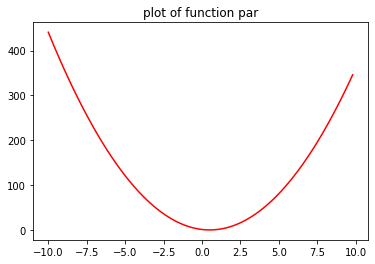

In [9]:
###################
### Question 8 ####
###################

import matplotlib.pyplot as plt
import numpy as np

def simple_graph(f):
    def wrapper():
        x = np.arange(-10,10,0.2) # Define the range of x values
        y = f(x) # Numpy lets us just take the entire range of values and apply the function to it
        plt.plot(x,y, color = "red")
        plt.title("plot of function %s" % f.__name__)
    return wrapper
    
@simple_graph
def par(x):
    return (2*x - 1)**2

par()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


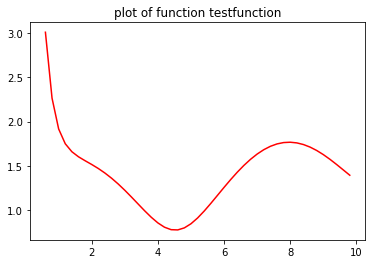

In [10]:
@simple_graph
def testfunction(x):
    return np.sqrt(np.sin(x)+np.log(x))+1/x**2 # Just a random function - doesn't have any particular meaning

testfunction()